In [1]:
import sys
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import fredapi as fd
from simulation import simulate_lending
from utils import prepare_period_cohort_table, preprocess_data_for_apc_analysis
fred = fd.Fred(api_key='f9359e11d5921a988a3a340406c3fc55')

SRC_SUBDIR = '../'
SRC_SUBDIR = osp.abspath(SRC_SUBDIR)
if SRC_SUBDIR not in sys.path:
    print(f'Adding source directory to the sys.path: {SRC_SUBDIR!r}')
    sys.path.insert(1, SRC_SUBDIR)

palette = ['#001A72', '#FC4C02', '#41B6E6', '#B7C01B', '#00D4C5', '#00A499', '#DBE442']
bg = '#EBF6F3'

plt.rcParams.update({'axes.facecolor':bg})
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=palette)

Adding source directory to the sys.path: '/home/lsio/projects/notebooks'


In [2]:
uk_cpi = fred.get_series("GBRCPIALLMINMEI")
uk_unemp = fred.get_series("LRUN64TTGBQ156S")
test_cutoff_year = 2010

In [3]:
beta_0 = -4
beta_age = pd.Series([.7, .5, .4, .3, .2, .2, .1, .05, 0, 0, -.05, -.075, -.1, -.125, -.15])
unnormalised_beta_unemp_period, unnormalised_beta_inflation_period = 6, 8
unnormalised_beta_unemp_cohort, unnormalised_beta_inflation_cohort = -2, -1
period_cohort_table = prepare_period_cohort_table(
    uk_cpi, uk_unemp,
    unnormalised_beta_unemp_period, unnormalised_beta_inflation_period,
    unnormalised_beta_unemp_cohort, unnormalised_beta_inflation_cohort
)

In [4]:
yob = simulate_lending(period_cohort_table, beta_0, beta_age)

  0% (0 of 33) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  3% (1 of 33) |                         | Elapsed Time: 0:00:00 ETA:   0:00:08
  6% (2 of 33) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:10
  9% (3 of 33) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:09
 12% (4 of 33) |###                      | Elapsed Time: 0:00:01 ETA:   0:00:10
 15% (5 of 33) |###                      | Elapsed Time: 0:00:01 ETA:   0:00:10
 18% (6 of 33) |####                     | Elapsed Time: 0:00:02 ETA:   0:00:11
 21% (7 of 33) |#####                    | Elapsed Time: 0:00:03 ETA:   0:00:13
 24% (8 of 33) |######                   | Elapsed Time: 0:00:04 ETA:   0:00:14
 27% (9 of 33) |######                   | Elapsed Time: 0:00:05 ETA:   0:00:15
 30% (10 of 33) |#######                 | Elapsed Time: 0:00:07 ETA:   0:00:16
 33% (11 of 33) |########                | Elapsed Time: 0:00:08 ETA:   0:00:17
 36% (12 of 33) |########               

In [5]:
apc_df, apc_df_test = preprocess_data_for_apc_analysis(yob, period_cohort_table, test_cutoff_year)
apc_df.head()

size  sum     unemp  inflation
age period cohort                                
0   1991   1991    5000  358  0.088915   0.069437
    1992   1992    5000  366  0.100419   0.043900
1   1992   1991    4642  271  0.100419   0.043900
0   1993   1993    5000  299  0.104778   0.024947
1   1993   1992    4634  219  0.104778   0.024947

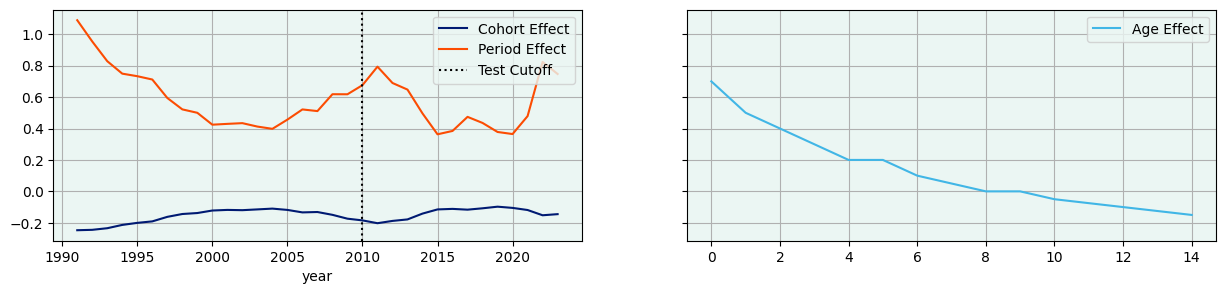

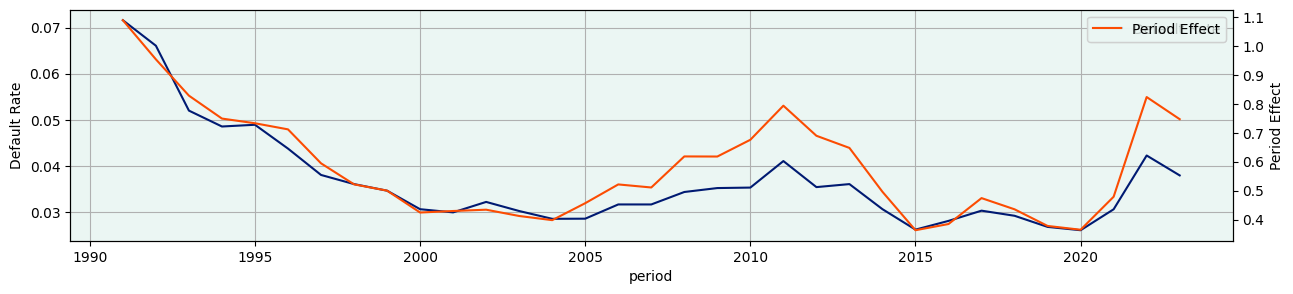

In [6]:
_, axs = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
period_cohort_table.cohort.plot(ax = axs[0], color = palette[0], label = "Cohort Effect")
period_cohort_table.period.plot(ax = axs[0], color = palette[1], label = "Period Effect")
beta_age.plot(ax = axs[1], color = palette[2], label = "Age Effect")
axs[0].axvline(test_cutoff_year, color = "k", linestyle = ":", label = "Test Cutoff")

axs[0].grid()
axs[0].legend()
axs[1].legend()
axs[1].grid()

_, ax = plt.subplots(figsize = (15, 3), sharey = True)
yob.groupby("period")["default"].mean().plot(ax = ax, label = "Default Rate")
ax.set_ylabel("Default Rate")
ax.legend()
tax = ax.twinx()
period_cohort_table.period.plot(ax = tax, color = palette[1], label = "Period Effect")
tax.set_ylabel("Period Effect")
ax.grid()

tax.legend()